In [1]:
# Import the necessary libraries
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Load the dataset from the file you provided
# (Assuming the file 'Carseats.csv' is in your current folder)
df = pd.read_csv('/home/mohibullah-iskandary/Downloads/Carseats.csv')

# Let's peek at the first few rows to understand what we're working with
print("First look at the data:")
print(df.head())
print("\nData types and info:")
print(df.info())

First look at the data:
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  

Data types and info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertisi

In [2]:
# Fit the multiple regression model
# The 'C()' function tells statsmodels that 'Urban' and 'US' are categorical (qualitative) variables.
model_a = smf.ols('Sales ~ Price + C(Urban) + C(US)', data=df).fit()

# Print the summary of the model results
print("\n(a) Model Summary for Sales ~ Price + Urban + US:")
print(model_a.summary())


(a) Model Summary for Sales ~ Price + Urban + US:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.234
Method:                 Least Squares   F-statistic:                     41.52
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           2.39e-23
Time:                        17:10:42   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1863.
Df Residuals:                     396   BIC:                             1879.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [3]:
# Fit the new, smaller model without 'Urban'
model_e = smf.ols('Sales ~ Price + C(US)', data=df).fit()

# Print the summary of the new model
print("\n(e) Smaller Model Summary for Sales ~ Price + US:")
print(model_e.summary())


(e) Smaller Model Summary for Sales ~ Price + US:
                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.239
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     62.43
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           2.66e-24
Time:                        17:17:50   Log-Likelihood:                -927.66
No. Observations:                 400   AIC:                             1861.
Df Residuals:                     397   BIC:                             1873.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

In [5]:
# Get the 95% confidence intervals for the coefficients in model_e
# conf_int = model_e.conf_int(alpha=0.05) # alpha=0.05 gives a 95% CI
# conf_int.columns = ['2.5%', '97.5%'] # Rename the columns for clarity
conf_int = model_e.conf_int(alpha = 0.05) # alpha = 0.05 gives a 95% CI
conf_int.columns = ['2.5 %' , '97.5 %'] # Rename the columns for Clarity
print("\n(g) 95% Confidence Intervals for the coefficients in the final model (Price + US):")
print(conf_int)


(g) 95% Confidence Intervals for the coefficients in the final model (Price + US):
                 2.5 %     97.5 %
Intercept     11.79032  14.271265
C(US)[T.Yes]   0.69152   1.707766
Price         -0.06476  -0.044195


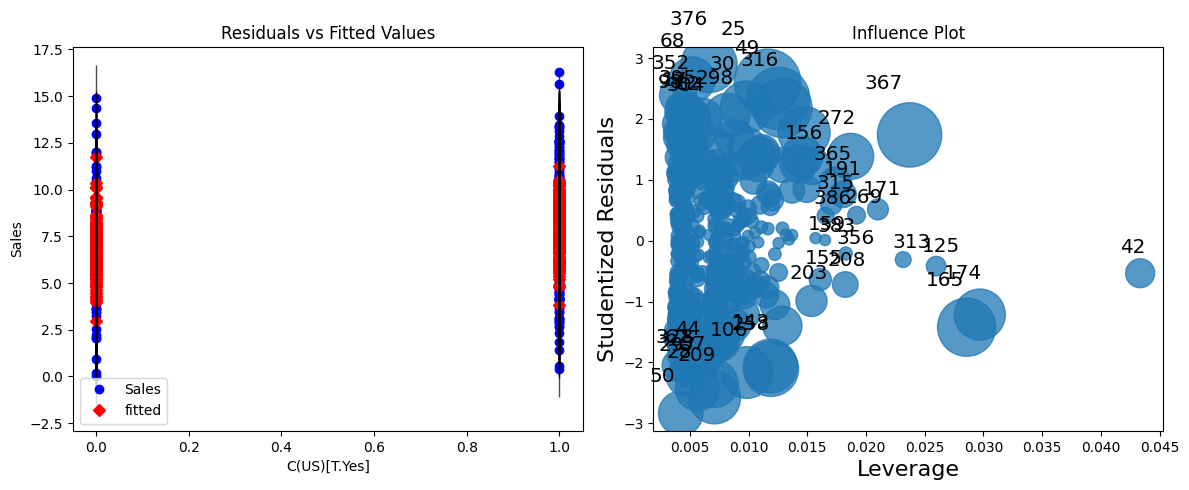

In [6]:
# Import a library for plotting
import matplotlib.pyplot as plt

# Figure for our diagnostics
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # 1 row, 2 columns of plots

# 1. Residuals vs Fitted values plot - checks for non-linearity and outliers
sm.graphics.plot_fit(model_e, 1, ax=axes[0])
axes[0].set_title('Residuals vs Fitted Values')

# 2. Influence plot - checks for high leverage and outliers
# This plot combines studentized residuals (size of point) and leverage (on the x-axis)
sm.graphics.influence_plot(model_e, ax=axes[1], criterion="cooks")
axes[1].set_title('Influence Plot')

# Make the plots look nice and show them
plt.tight_layout()
plt.show()